In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/Diabetes data shylet medical.csv")
data.head()

Age Gender Polyuria Polydipsia  ... muscle stiffness Alopecia Obesity     class
0   40   Male       No        Yes  ...              Yes      Yes     Yes  Positive
1   58   Male       No         No  ...               No      Yes      No  Positive
2   41   Male      Yes         No  ...              Yes      Yes      No  Positive
3   45   Male       No         No  ...               No       No      No  Positive
4   60   Male      Yes        Yes  ...              Yes      Yes     Yes  Positive

[5 rows x 17 columns]

In [3]:
columns = data.columns

In [4]:
columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in columns:
  if data[i].dtypes == 'O':
    data[i] = le.fit_transform(data[i])

data.head()

Age  Gender  Polyuria  ...  Alopecia  Obesity  class
0   40       1         0  ...         1        1      1
1   58       1         0  ...         1        0      1
2   41       1         1  ...         1        0      1
3   45       1         0  ...         0        0      1
4   60       1         1  ...         1        1      1

[5 rows x 17 columns]

In [6]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
data.iloc[:, [0]] = scale.fit_transform(data.iloc[:, [0]])

In [7]:
data.head()

Age  Gender  Polyuria  ...  Alopecia  Obesity  class
0  0.324324       1         0  ...         1        1      1
1  0.567568       1         0  ...         1        0      1
2  0.337838       1         1  ...         1        0      1
3  0.391892       1         0  ...         0        0      1
4  0.594595       1         1  ...         1        1      1

[5 rows x 17 columns]

In [8]:
x = data.drop(['class'], axis = 1)
y = data['class']

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [10]:
pip install shap

In [11]:
import shap
def show_shap(model):
  explainer = shap.Explainer(model.predict, x_train, feature_names= columns)
  svalues = explainer(x_test)
  shap.summary_plot(svalues)
  shap.plots.bar(svalues, max_display=20)

  #store SHAP values of every feature
  values = []
  for i in range(svalues.values.shape[1]):
    a=0
    for j in range(svalues.values.shape[0]):
      a += abs(svalues.values[j][i])
    mean = a/svalues.values.shape[0]
    values.append("{:.3f}".format(mean))
  return values

def shap_value_data(shap_values, data):
  data_frame = pd.DataFrame([values,], columns=columns[:16])
  return pd.concat([data, data_frame], ignore_index= True)


###**Logistic Regression**

In [12]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

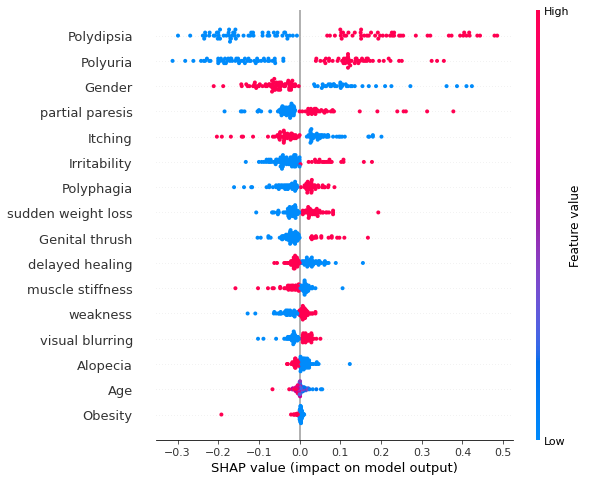

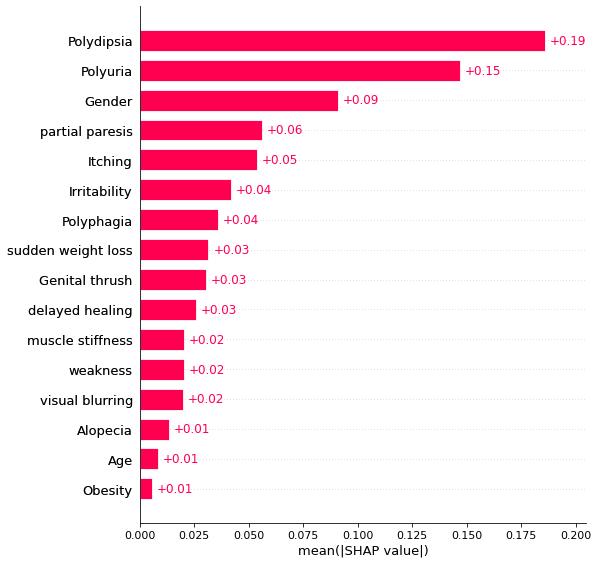

In [13]:
values = show_shap(lr)

In [14]:
shap_data = pd.DataFrame([values,], columns=columns[:16])

In [15]:
shap_data

Age Gender Polyuria  ... muscle stiffness Alopecia Obesity
0  0.009  0.091    0.147  ...            0.020    0.013   0.006

[1 rows x 16 columns]

###**KNN**

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Permutation explainer: 105it [01:05,  1.60it/s]


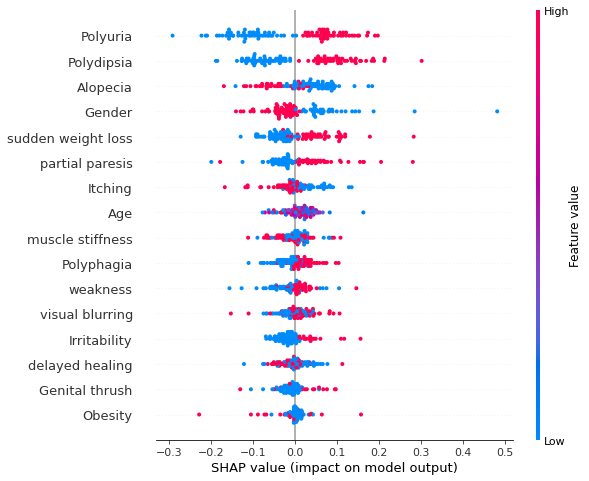

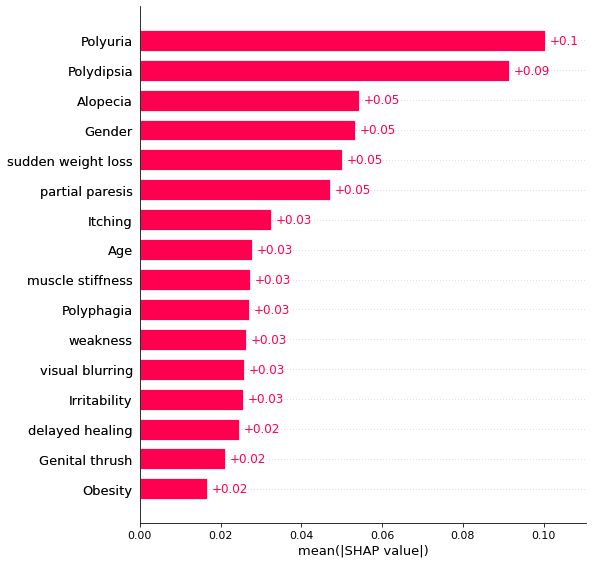

In [17]:
values = show_shap(knn)
shap_data = shap_value_data(values, shap_data)

###**Support Vector Classifier**

In [18]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

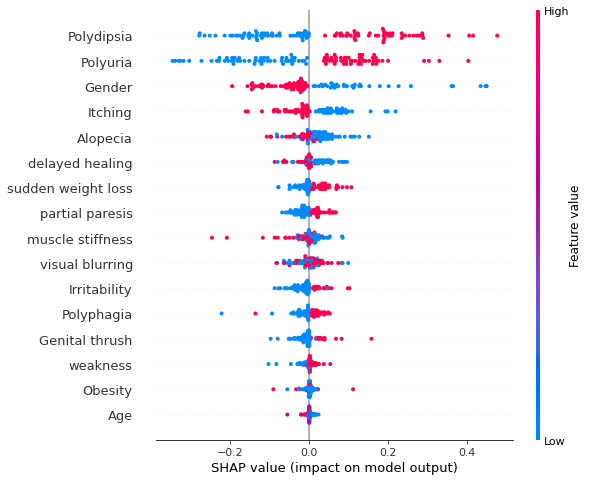

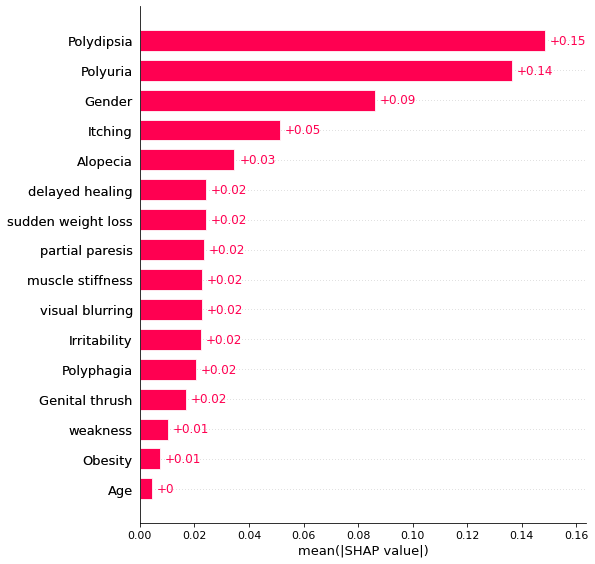

In [19]:
values = show_shap(svc)
shap_data = shap_value_data(values, shap_data)

###**Naive Bayes**

In [20]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

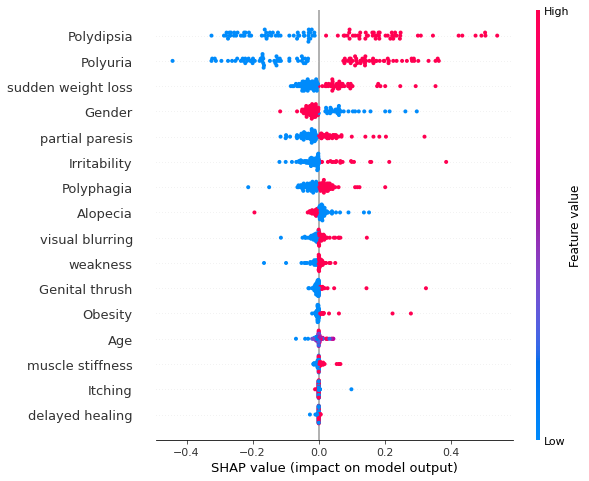

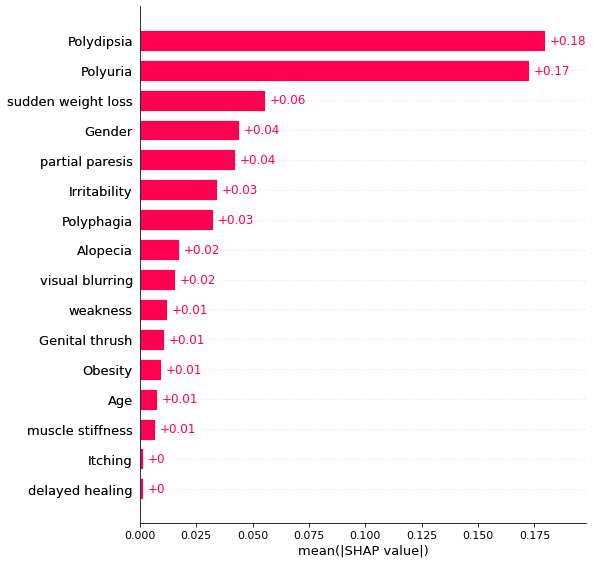

In [21]:
values = show_shap(nb)
shap_data = shap_value_data(values, shap_data)

###**Decision Tree**

In [22]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

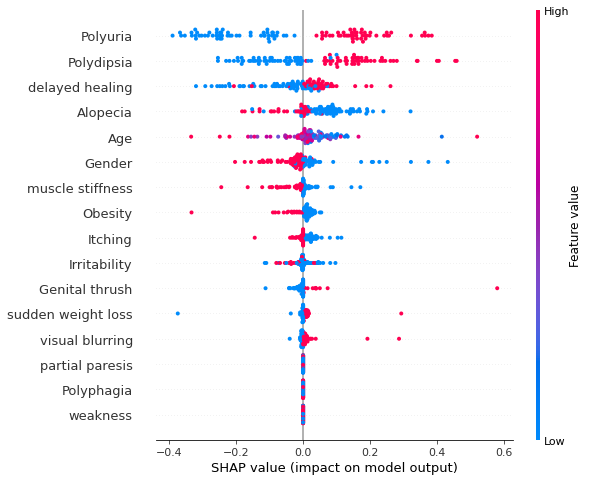

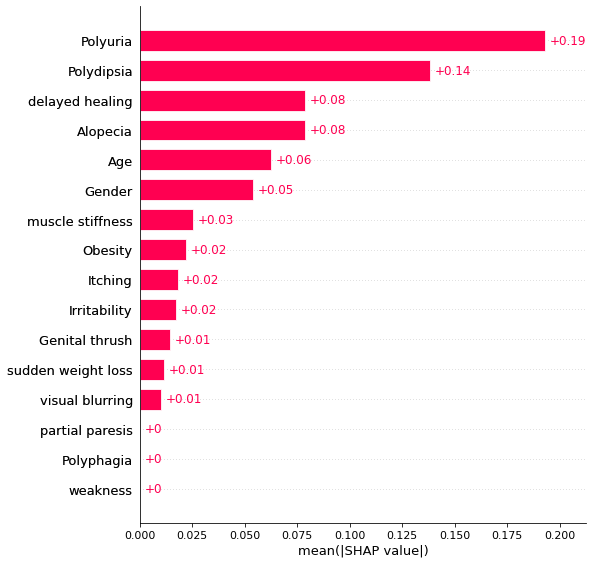

In [23]:
values = show_shap(tree)
shap_data = shap_value_data(values, shap_data)

###**Random Forest**

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Permutation explainer: 105it [00:22,  4.70it/s]


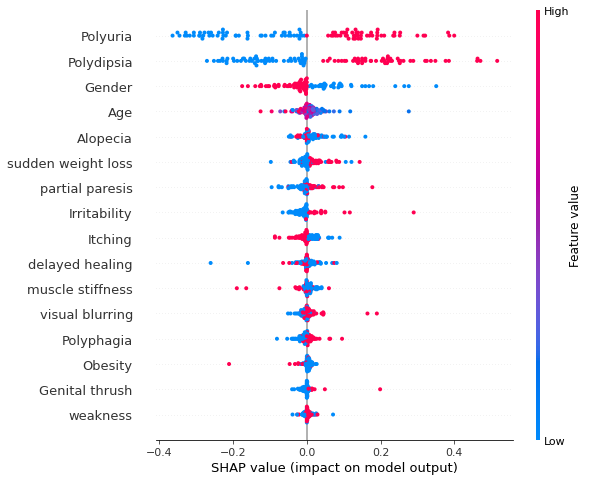

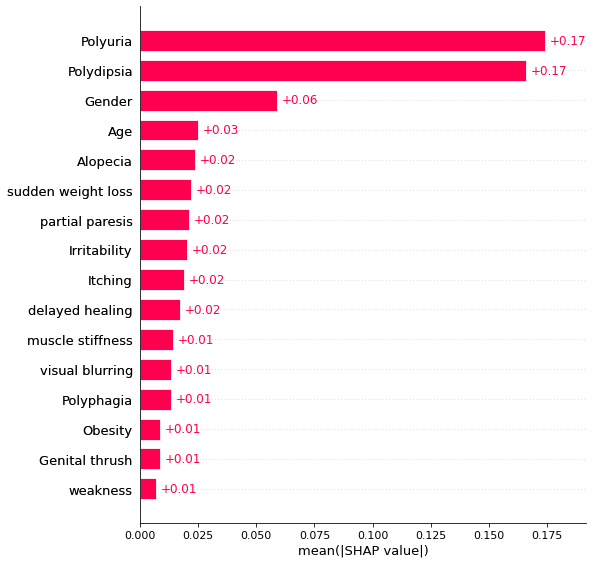

In [25]:
values = show_shap(rf)
shap_data = shap_value_data(values, shap_data)

###**Stochastic Gradient Descent**

In [26]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(x_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

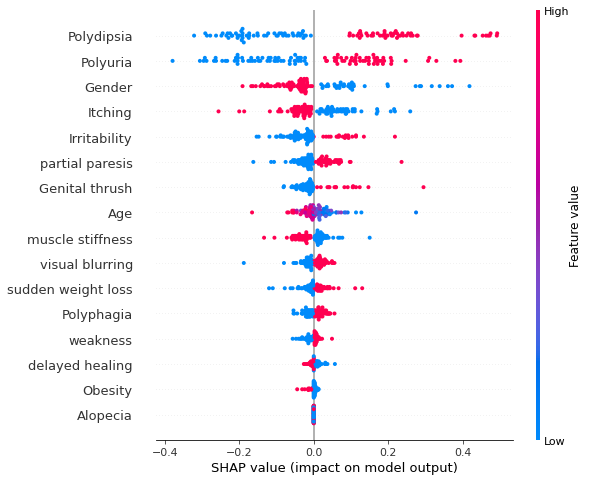

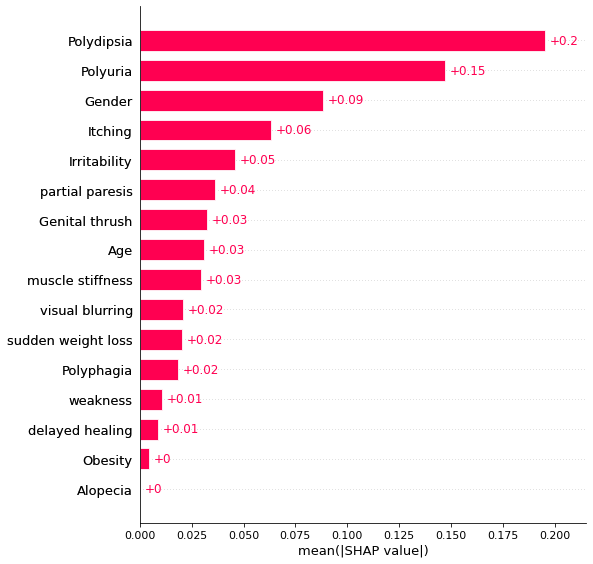

In [27]:
values = show_shap(sgd)
shap_data = shap_value_data(values, shap_data)

###**Perceptron**

In [28]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(x_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

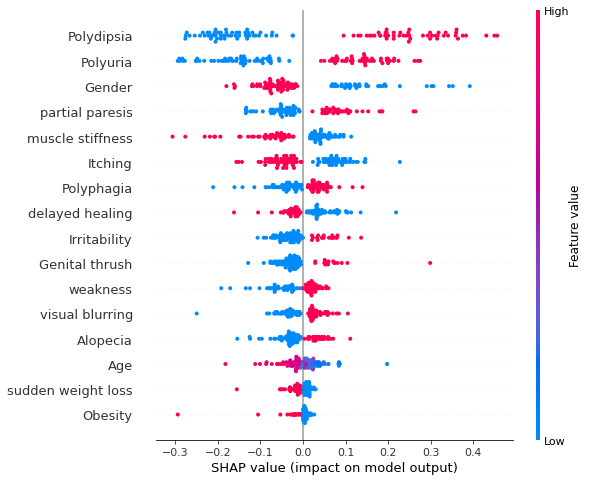

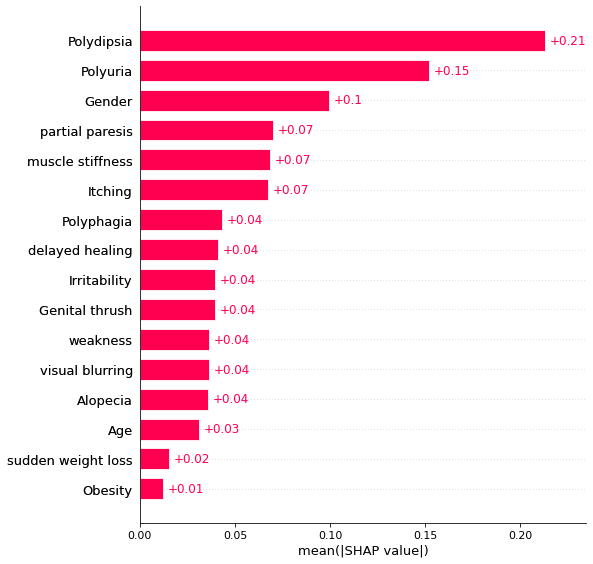

In [29]:
values = show_shap(perceptron)
shap_data = shap_value_data(values, shap_data)

###**AdaBoost**

In [30]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier()
adaboost.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

Permutation explainer: 105it [00:20,  5.10it/s]


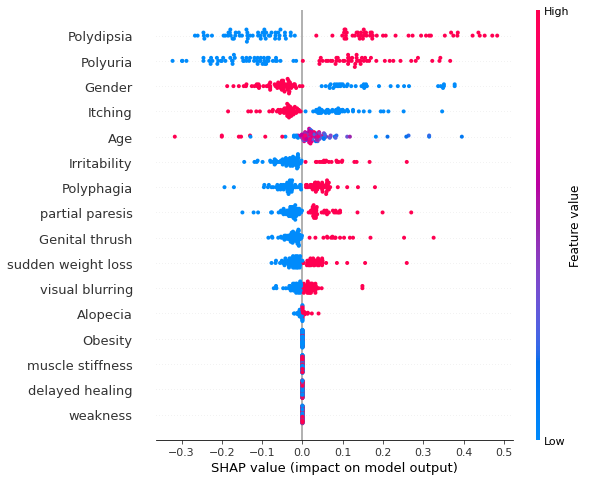

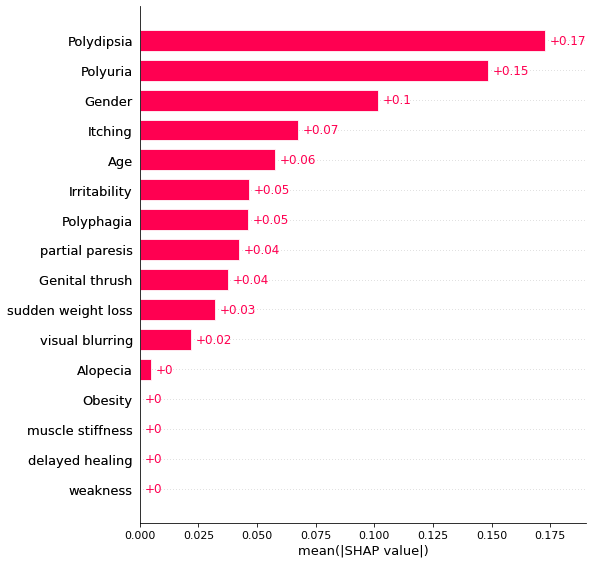

In [31]:
values = show_shap(adaboost)
shap_data = shap_value_data(values, shap_data)

###**XGBoost**

In [32]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

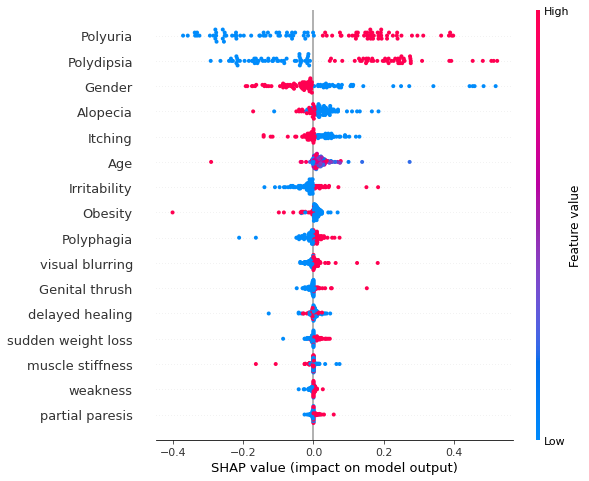

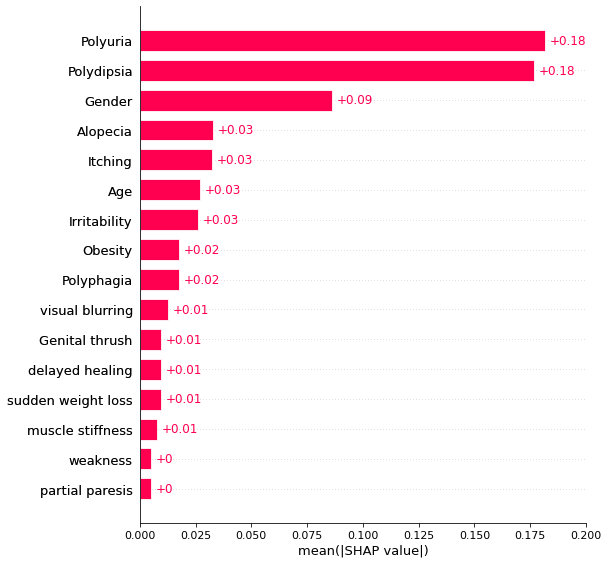

In [33]:
values = show_shap(xg)
shap_data = shap_value_data(values, shap_data)

###**PassiveAggressiveClassifier**

In [34]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier()
pac.fit(x_train, y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=1000, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

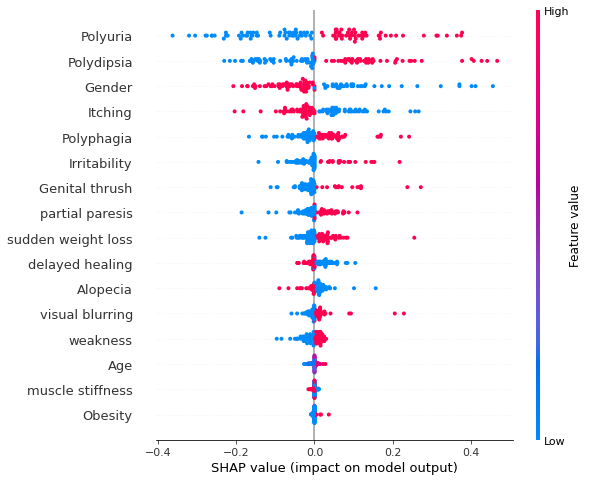

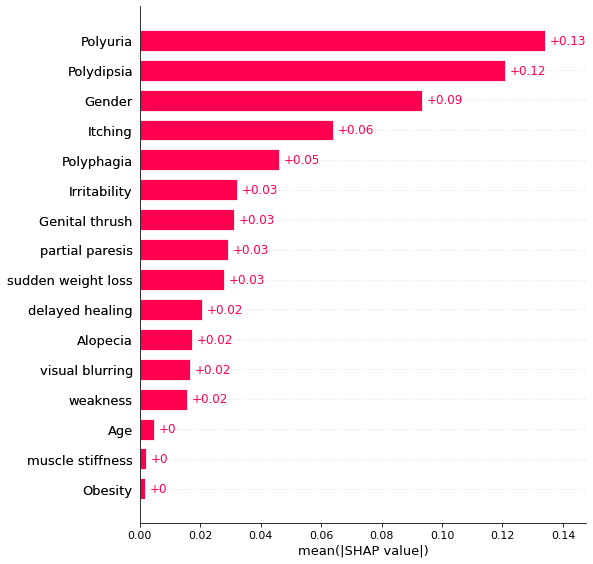

In [35]:
values = show_shap(pac)
shap_data = shap_value_data(values, shap_data)

###**RidgeClassifier**

In [36]:
from sklearn.linear_model import RidgeClassifier
ridge = RidgeClassifier()
ridge.fit(x_train, y_train)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

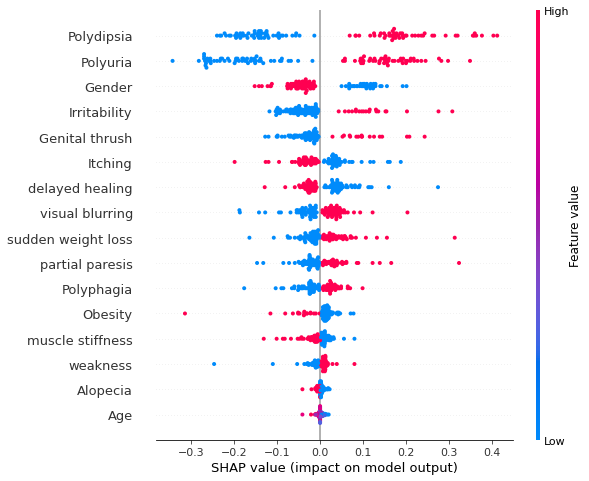

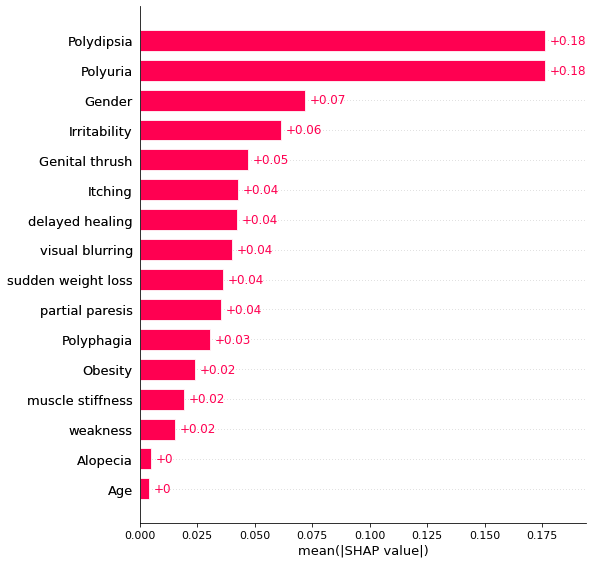

In [37]:
values = show_shap(ridge)
shap_data = shap_value_data(values, shap_data)

###**Nu-Support Vector Classifier**

In [38]:
from sklearn.svm import NuSVC
nu_svc = NuSVC()
nu_svc.fit(x_train, y_train)

NuSVC(break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, nu=0.5, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)

Permutation explainer: 105it [00:16,  6.19it/s]


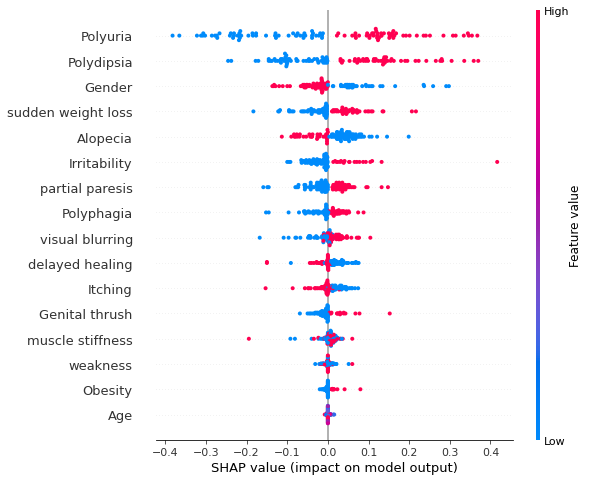

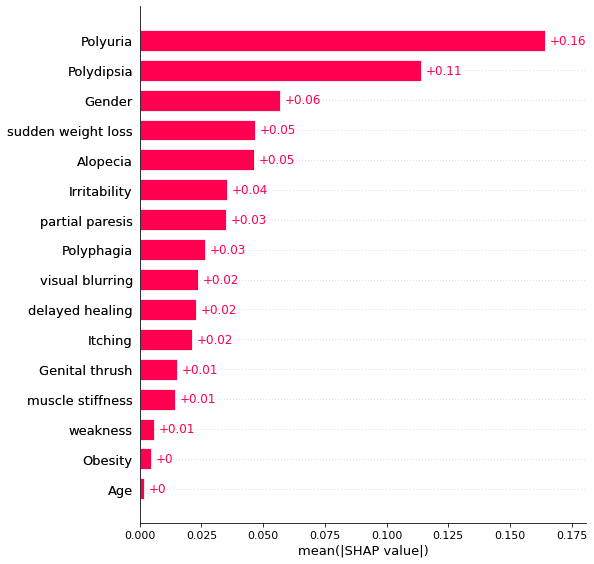

In [39]:
values = show_shap(nu_svc)
shap_data = shap_value_data(values, shap_data)

###**Linear Support Vector Classifier**

In [40]:
from sklearn.svm import LinearSVC
lin_svc = LinearSVC()
lin_svc.fit(x_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

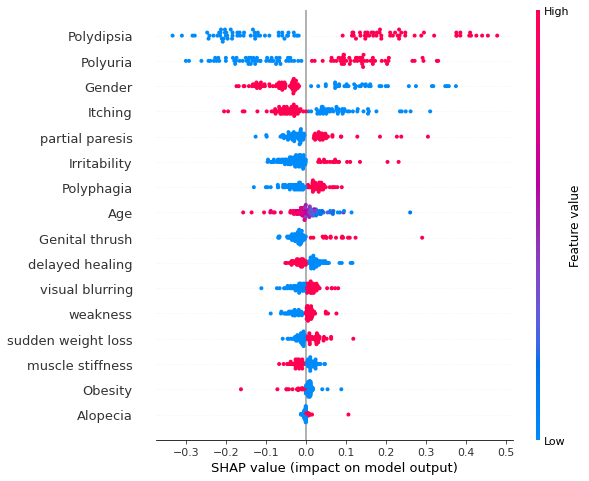

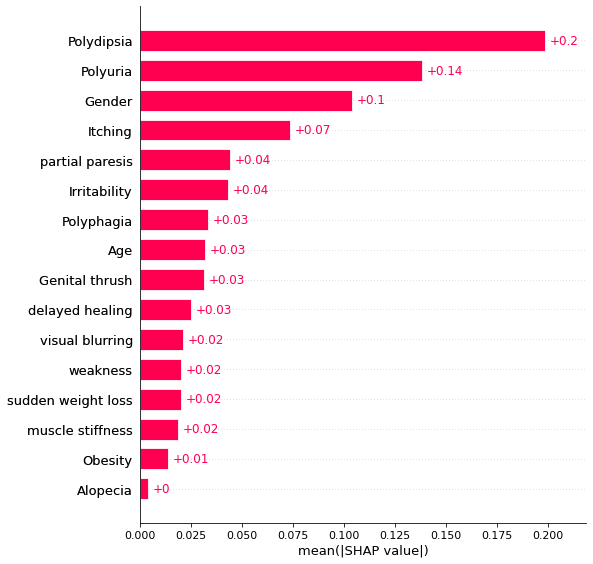

In [41]:
values = show_shap(lin_svc)
shap_data = shap_value_data(values, shap_data)

###**CalibratedClassifierCV**

In [42]:
from sklearn.calibration import CalibratedClassifierCV
calCV = CalibratedClassifierCV()
calCV.fit(x_train, y_train)

CalibratedClassifierCV(base_estimator=None, cv=None, method='sigmoid')

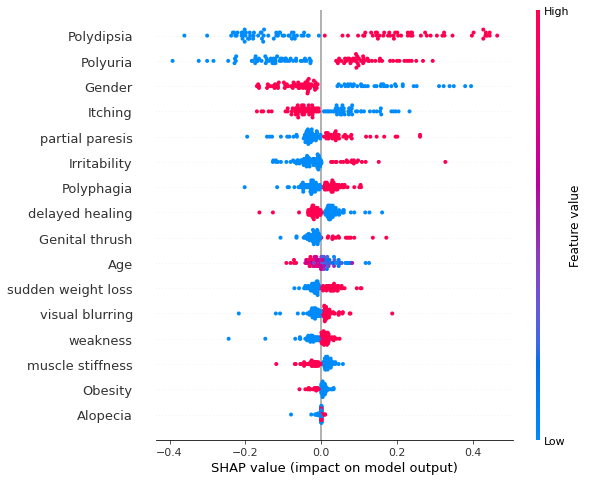

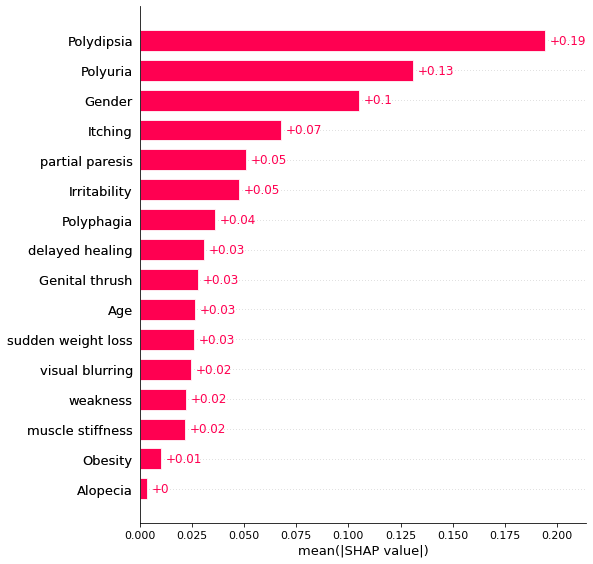

In [43]:
values = show_shap(calCV)
shap_data = shap_value_data(values, shap_data)

###**Nearest Centroid**

In [44]:
from sklearn.neighbors import NearestCentroid
nc = NearestCentroid()
nc.fit(x_train, y_train)

NearestCentroid(metric='euclidean', shrink_threshold=None)

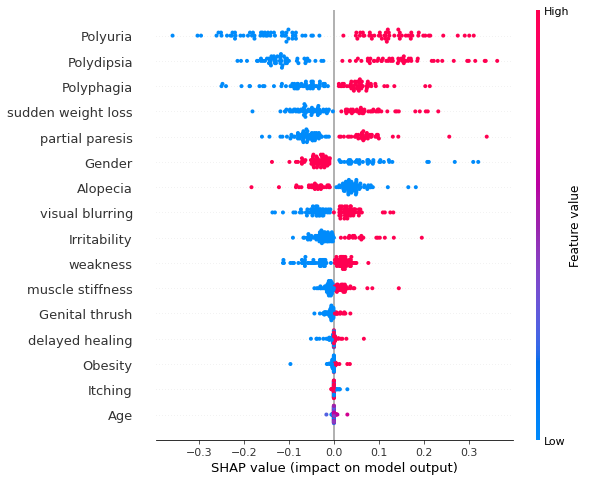

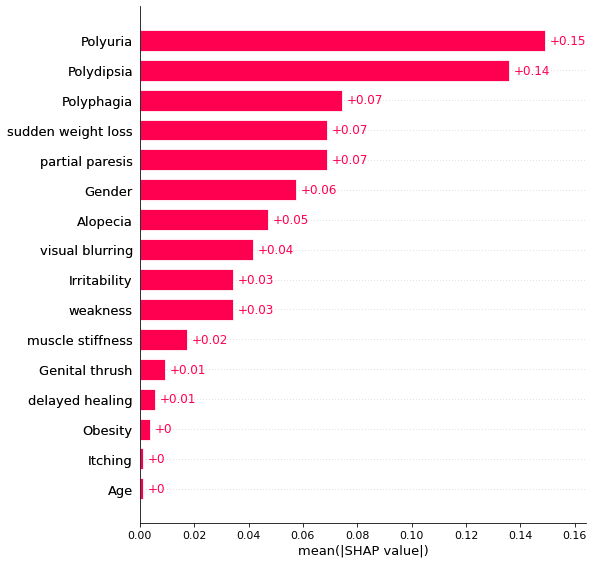

In [45]:
values = show_shap(nc)
shap_data = shap_value_data(values, shap_data)

###**Gaussian Process Classifier**

In [46]:
from sklearn.gaussian_process import GaussianProcessClassifier
gpc = GaussianProcessClassifier()
gpc.fit(x_train,y_train)

GaussianProcessClassifier(copy_X_train=True, kernel=None, max_iter_predict=100,
                          multi_class='one_vs_rest', n_jobs=None,
                          n_restarts_optimizer=0, optimizer='fmin_l_bfgs_b',
                          random_state=None, warm_start=False)

Permutation explainer: 105it [00:26,  3.99it/s]


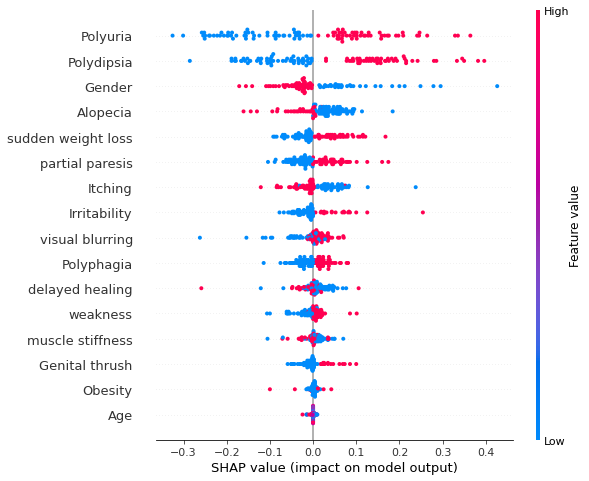

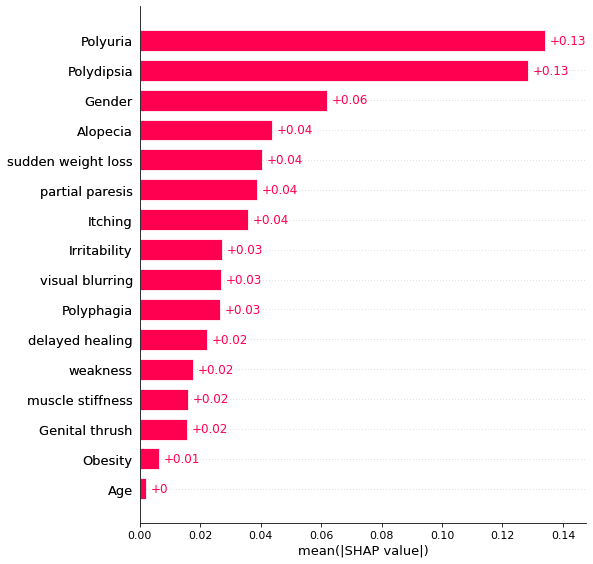

In [47]:
values = show_shap(gpc)
shap_data = shap_value_data(values, shap_data)

###**MultinomialNB**

In [48]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

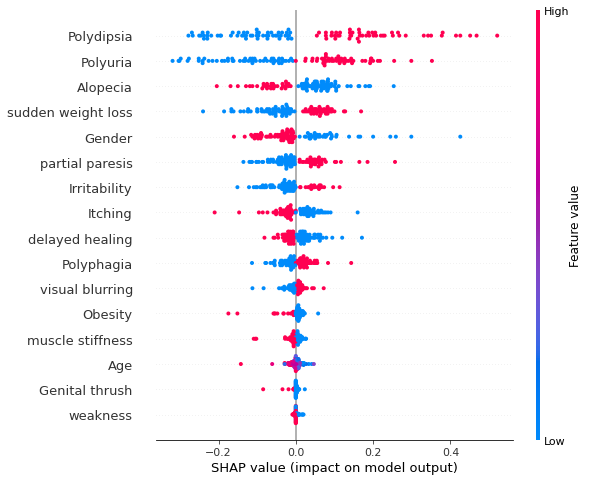

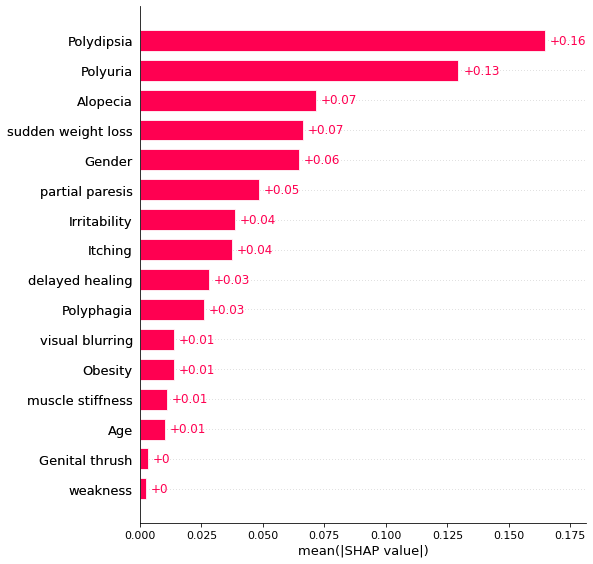

In [49]:
values = show_shap(mnb)
shap_data = shap_value_data(values, shap_data)

###**ComplementNB**

In [50]:
from sklearn.naive_bayes import ComplementNB
cnb = ComplementNB()
cnb.fit(x_train, y_train)

ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False)

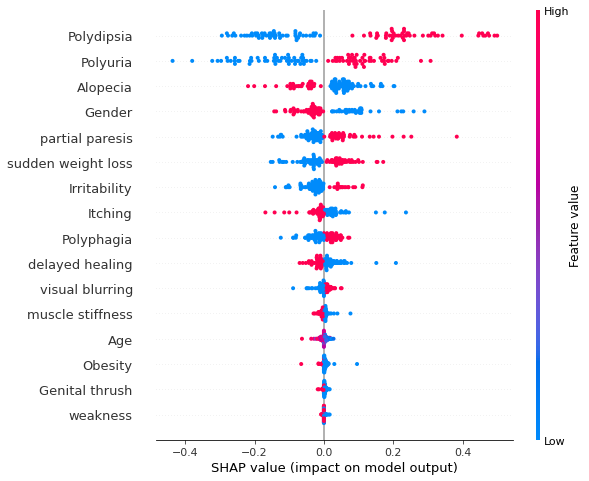

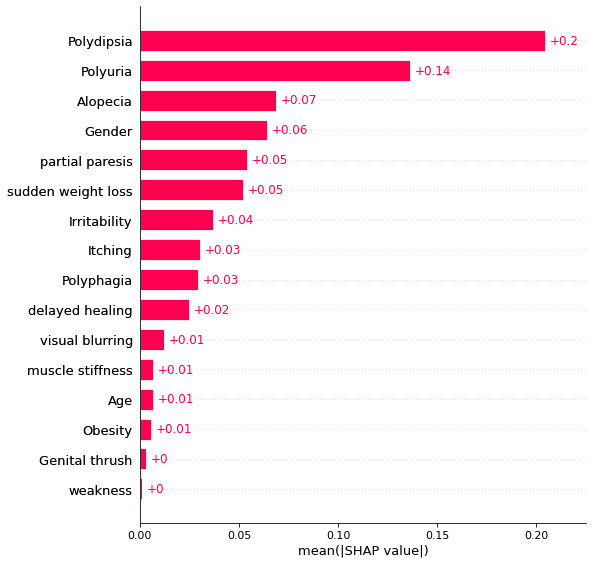

In [51]:
values = show_shap(cnb)
shap_data = shap_value_data(values, shap_data)

###**BernoulliNB**

In [52]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(x_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

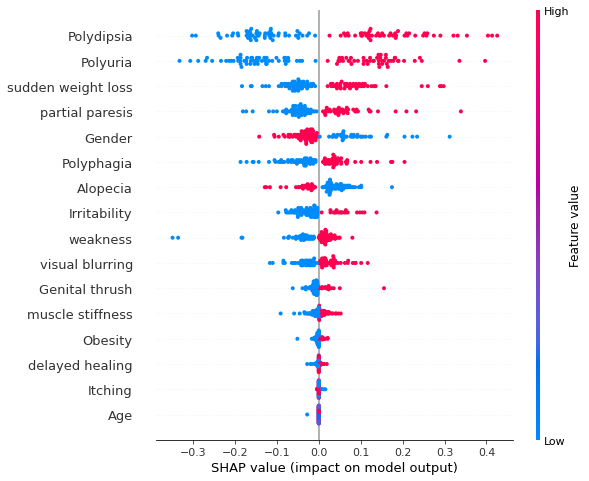

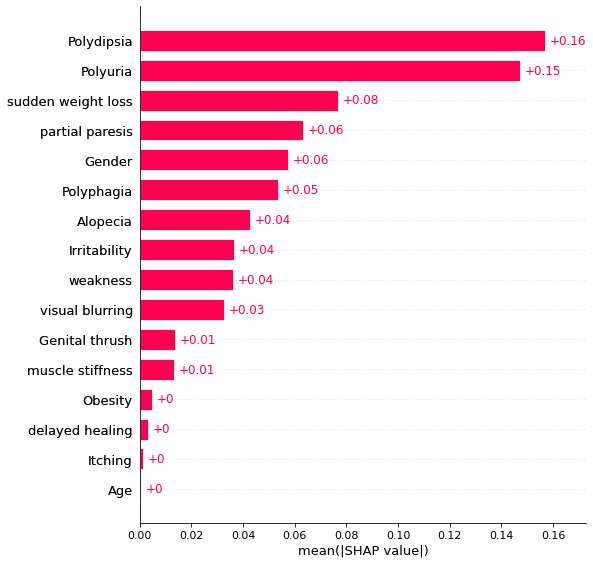

In [53]:
values =  show_shap(bnb)
shap_data = shap_value_data(values, shap_data)

###**CategoricalNB**

In [54]:
from sklearn.naive_bayes import CategoricalNB
ca_nb = CategoricalNB()
ca_nb.fit(x_train, y_train)

CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

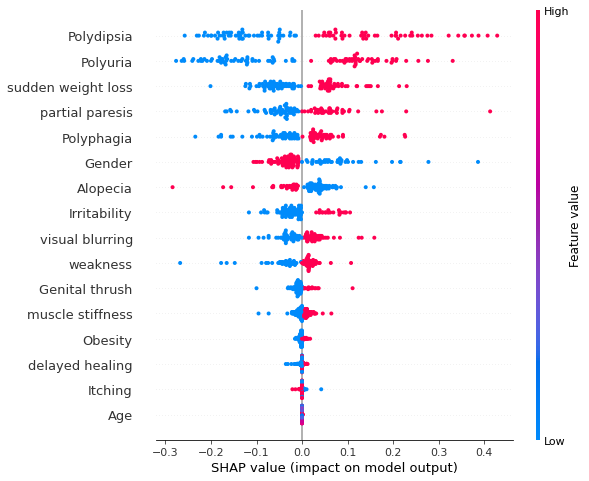

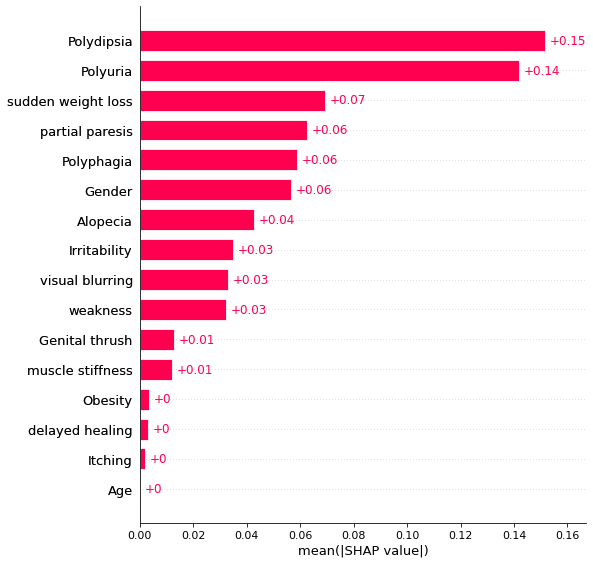

In [55]:
values = show_shap(ca_nb)
shap_data = shap_value_data(values, shap_data)

###**BaggingClassifier**

In [56]:
from sklearn.ensemble import BaggingClassifier
bag_c = BaggingClassifier()
bag_c.fit(x_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

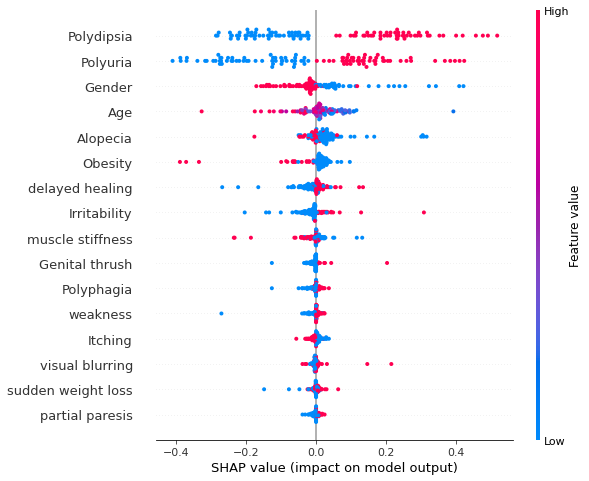

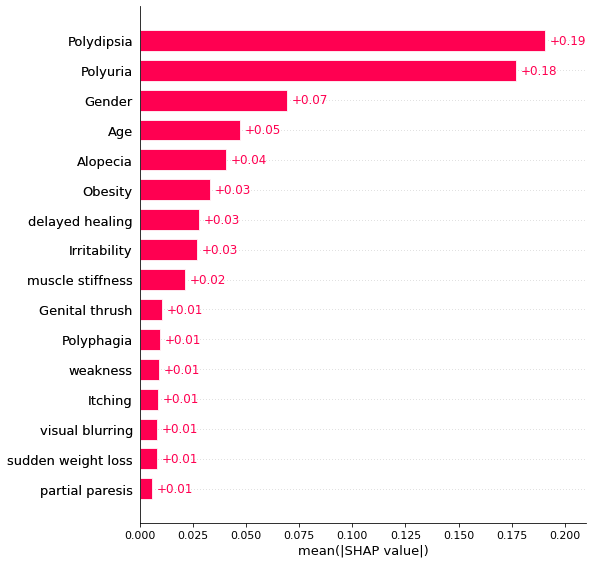

In [57]:
values = show_shap(bag_c)
shap_data = shap_value_data(values, shap_data)

###**ExtraTreesClassifier**

In [58]:
from sklearn.ensemble import ExtraTreesClassifier
ex_tree = ExtraTreesClassifier()
ex_tree.fit(x_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

Permutation explainer: 105it [00:22,  4.57it/s]


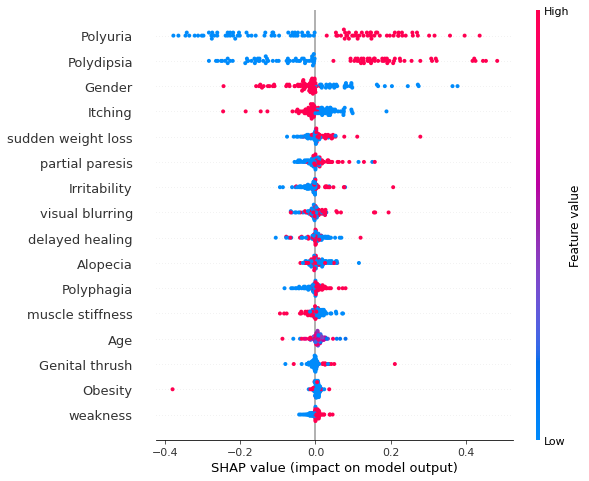

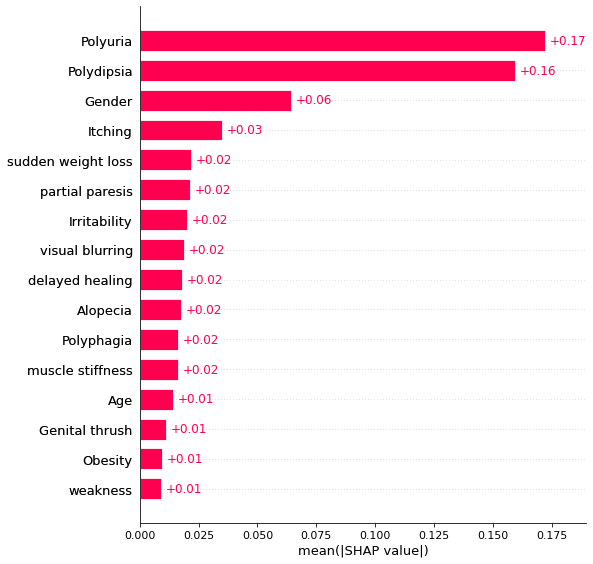

In [59]:
values = show_shap(ex_tree)
shap_data = shap_value_data(values, shap_data)

###**GradientBoostingClassifier**

In [60]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

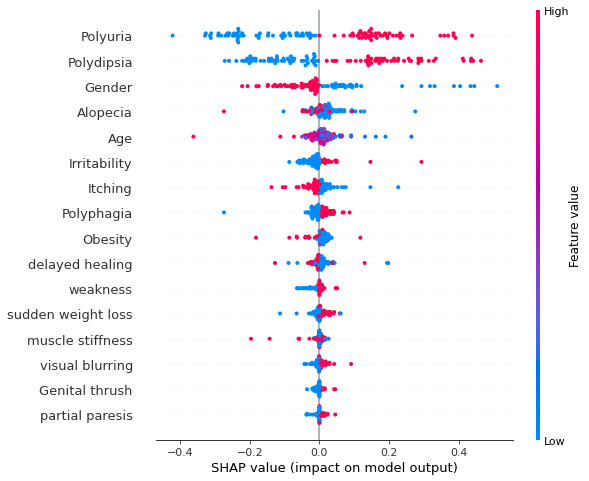

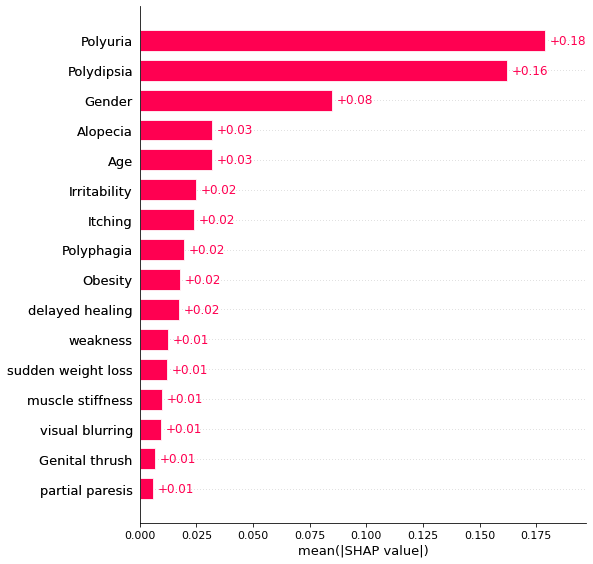

In [61]:
values = show_shap(gbc)
shap_data = shap_value_data(values, shap_data)

###**HistGradiantBoostingClassifier**

In [62]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
hgbc = HistGradientBoostingClassifier()
hgbc.fit(x_train, y_train)

HistGradientBoostingClassifier(l2_regularization=0.0, learning_rate=0.1,
                               loss='auto', max_bins=255, max_depth=None,
                               max_iter=100, max_leaf_nodes=31,
                               min_samples_leaf=20, n_iter_no_change=None,
                               random_state=None, scoring=None, tol=1e-07,
                               validation_fraction=0.1, verbose=0,
                               warm_start=False)

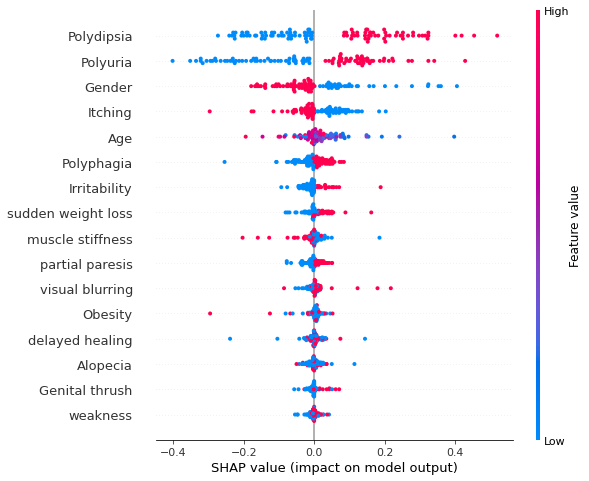

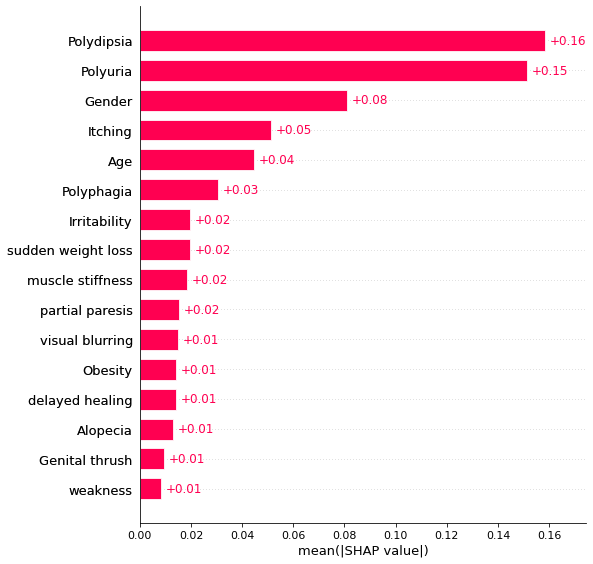

In [63]:
values = show_shap(hgbc)
shap_data = shap_value_data(values, shap_data)

###**OneVsRest Classifier**

In [64]:
from sklearn.multiclass import OneVsRestClassifier
one = OneVsRestClassifier(SVC())
one.fit(x_train, y_train)

OneVsRestClassifier(estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='rbf', max_iter=-1,
                                  probability=False, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False),
                    n_jobs=None)

Permutation explainer: 105it [00:10, 10.05it/s]


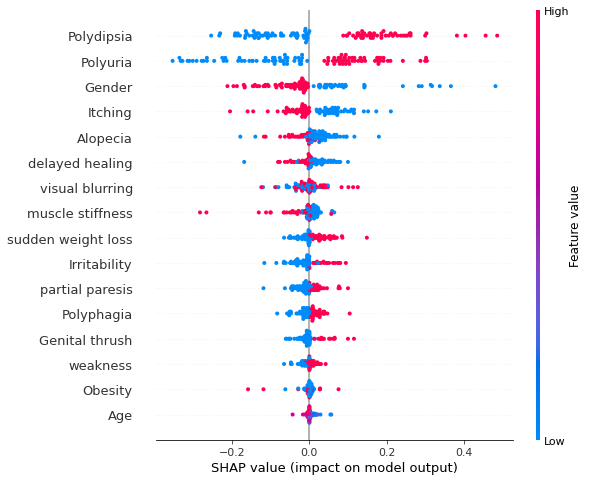

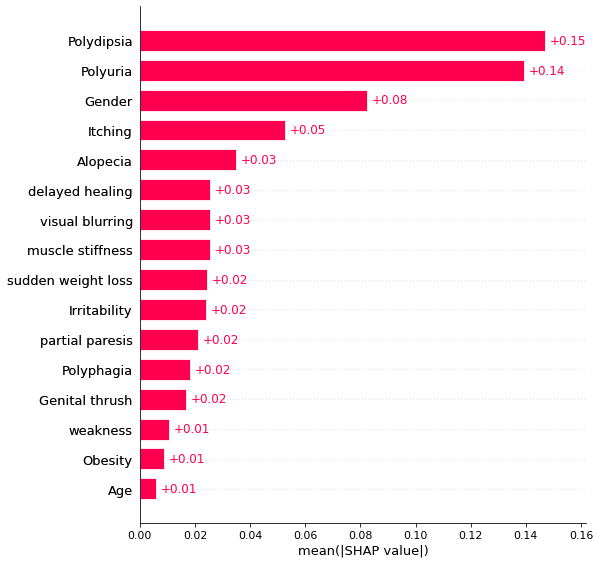

In [65]:
values =show_shap(one)
shap_data = shap_value_data(values, shap_data)

###**MLPClassifier**

In [66]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=1000)
mlp.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

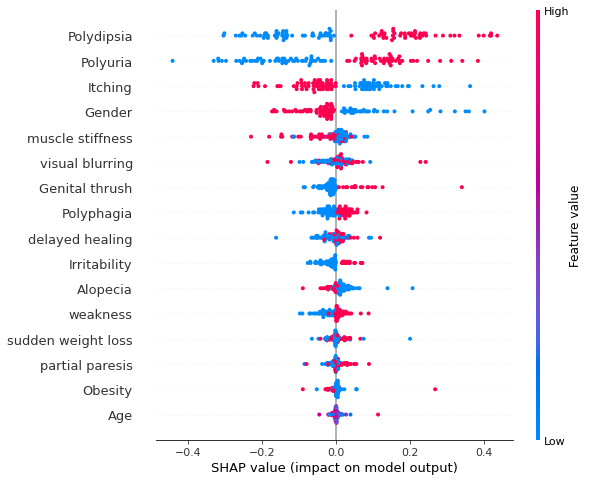

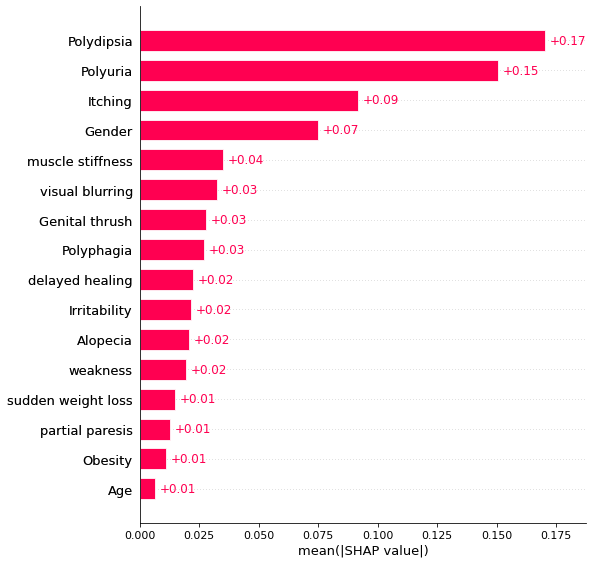

In [67]:
values = show_shap(mlp)
shap_data = shap_value_data(values, shap_data)

###**LabelPropagation**

In [68]:
from sklearn.semi_supervised import LabelPropagation
label = LabelPropagation()
label.fit(x_train, y_train)

LabelPropagation(gamma=20, kernel='rbf', max_iter=1000, n_jobs=None,
                 n_neighbors=7, tol=0.001)

Permutation explainer: 105it [00:28,  3.69it/s]


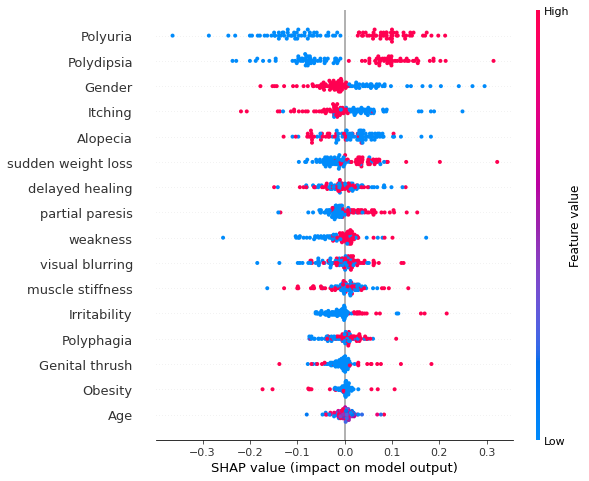

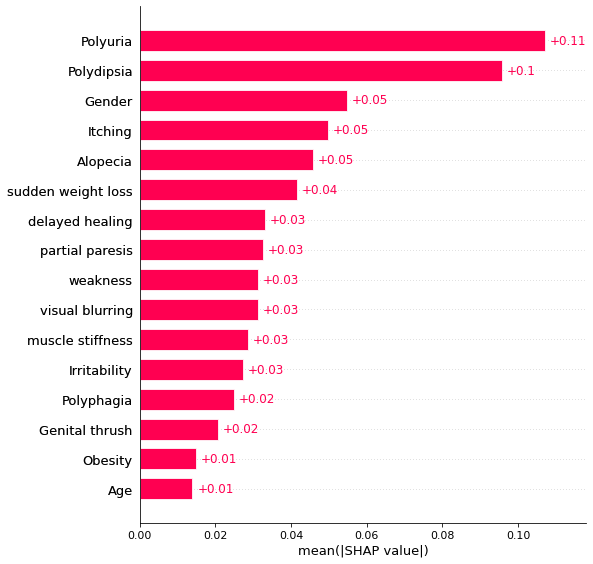

In [69]:
values = show_shap(label)
shap_data = shap_value_data(values, shap_data)

###**LabelSpreading**

In [70]:
from sklearn.semi_supervised import LabelSpreading
label_s = LabelSpreading()
label_s.fit(x_train, y_train)

LabelSpreading(alpha=0.2, gamma=20, kernel='rbf', max_iter=30, n_jobs=None,
               n_neighbors=7, tol=0.001)

Permutation explainer: 105it [00:28,  3.67it/s]


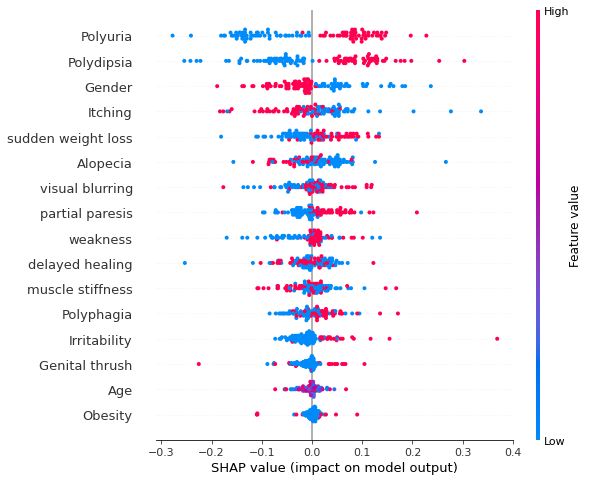

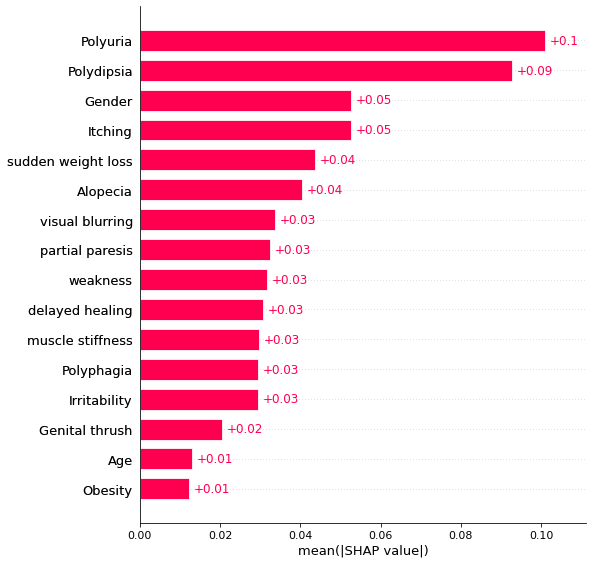

In [71]:
values = show_shap(label_s)
shap_data = shap_value_data(values, shap_data)

###**StackingClassifier**

In [72]:
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)),('svr', make_pipeline(StandardScaler(),LinearSVC(random_state=42)))]
sclf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
sclf.fit(x_train,y_train)

StackingClassifier(cv=None,
                   estimators=[('rf',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                     

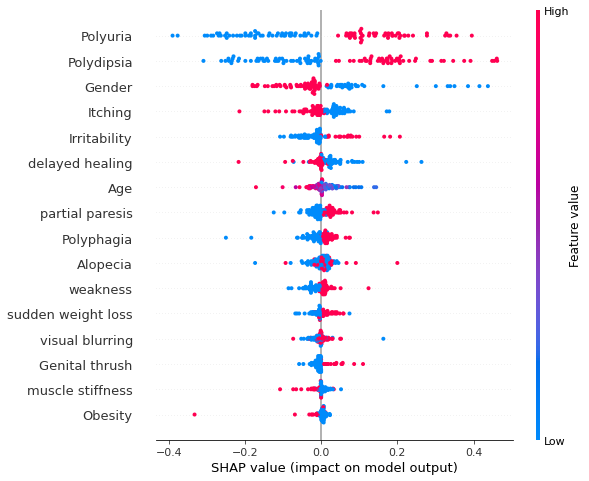

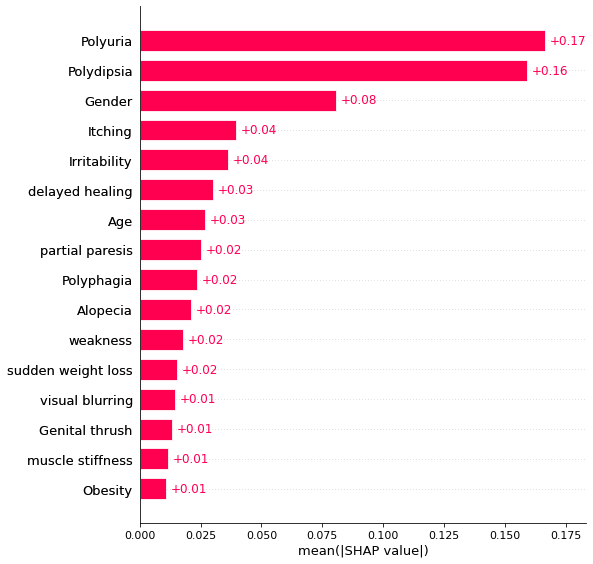

In [73]:
values = show_shap(sclf)
shap_data = shap_value_data(values, shap_data)

###**RidgeClassifierCV**

In [74]:
from sklearn.linear_model import RidgeClassifierCV
ridge_cv = RidgeClassifierCV()
ridge_cv.fit(x_train, y_train)

RidgeClassifierCV(alphas=array([ 0.1,  1. , 10. ]), class_weight=None, cv=None,
                  fit_intercept=True, normalize=False, scoring=None,
                  store_cv_values=False)

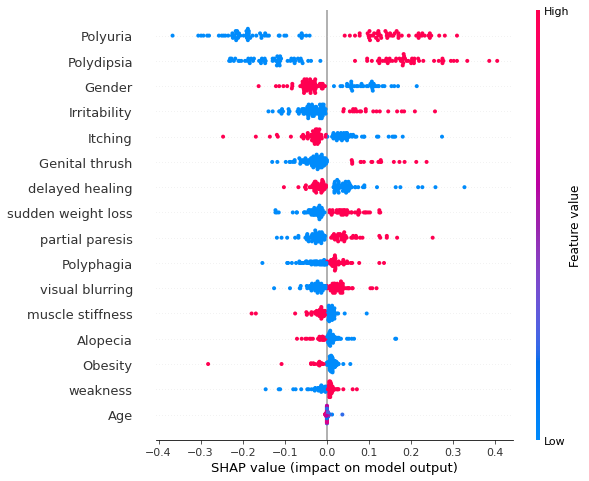

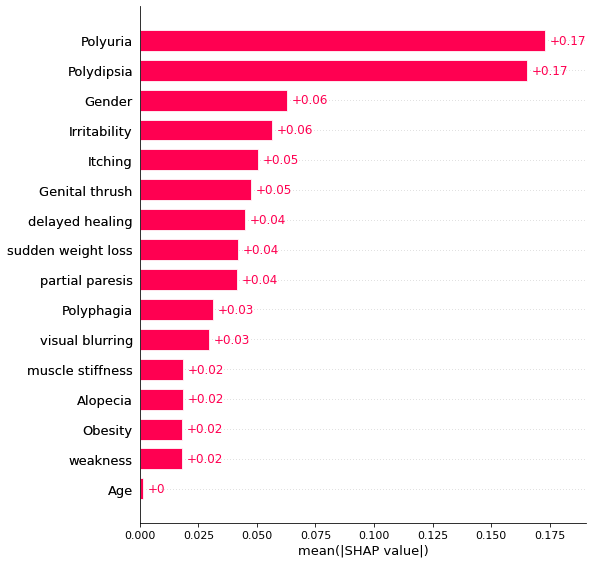

In [75]:
values = show_shap(ridge_cv)
shap_data = shap_value_data(values, shap_data)

###**LogisticRegressionCV**

In [76]:
from sklearn.linear_model import LogisticRegressionCV
log_cv = LogisticRegressionCV()
log_cv.fit(x_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

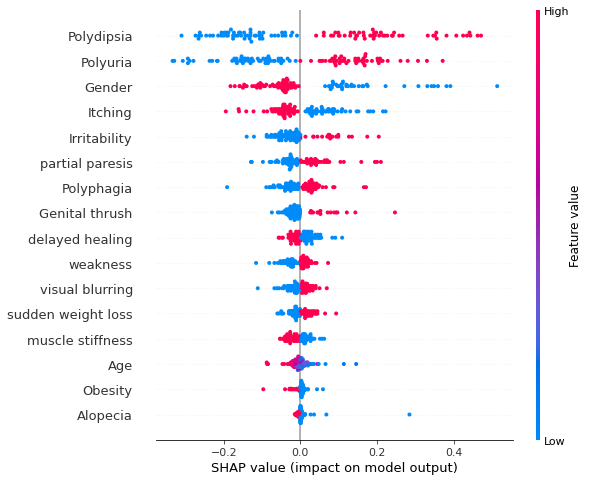

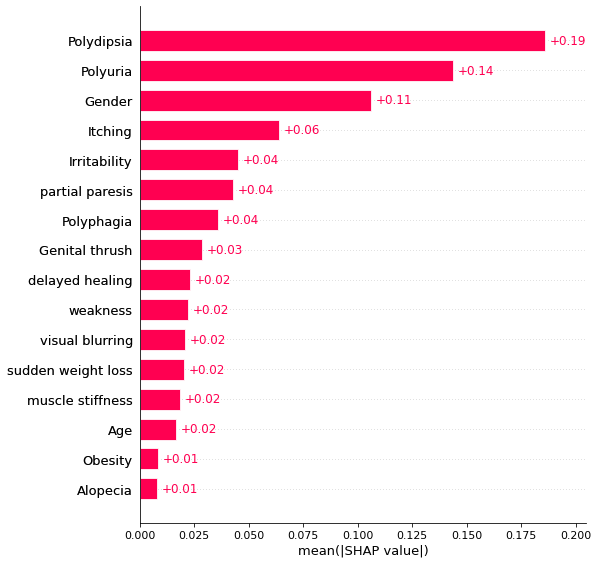

In [77]:
values = show_shap(log_cv)
shap_data = shap_value_data(values, shap_data)

###**LinearDiscriminantAnalysis**

In [78]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
linda = LinearDiscriminantAnalysis()
linda.fit(x_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

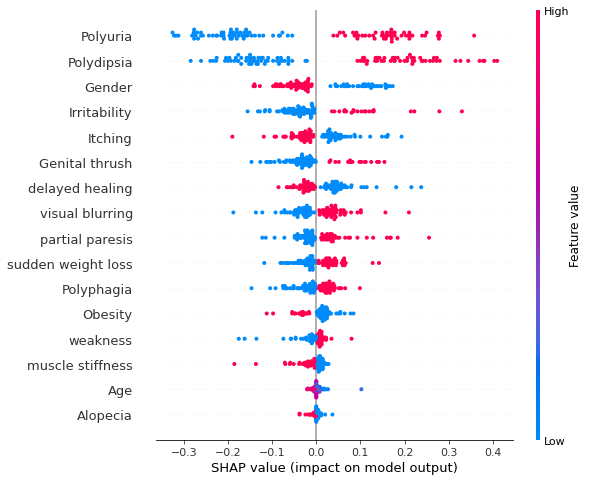

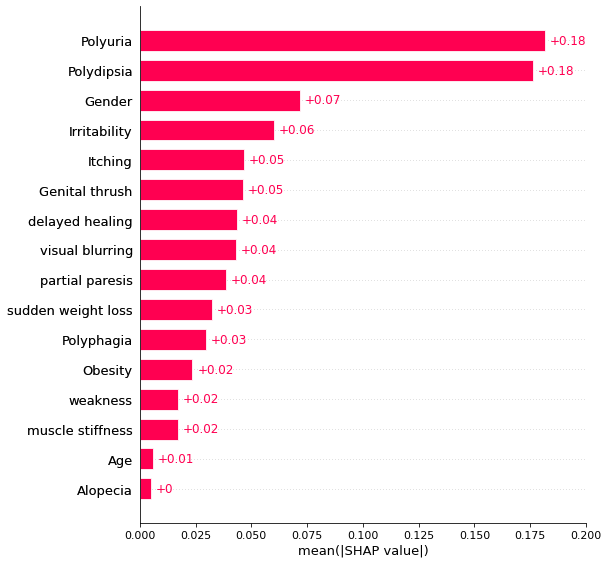

In [79]:
values = show_shap(linda)
shap_data = shap_value_data(values, shap_data)

###**QuadraticDiscriminantAnalysis**

In [80]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
quada = QuadraticDiscriminantAnalysis()
quada.fit(x_train,y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

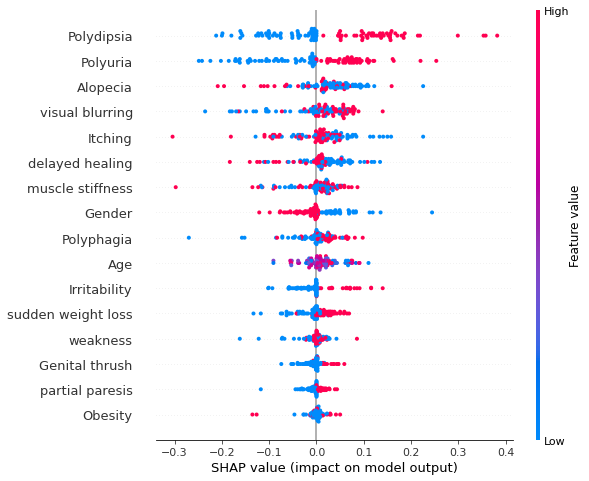

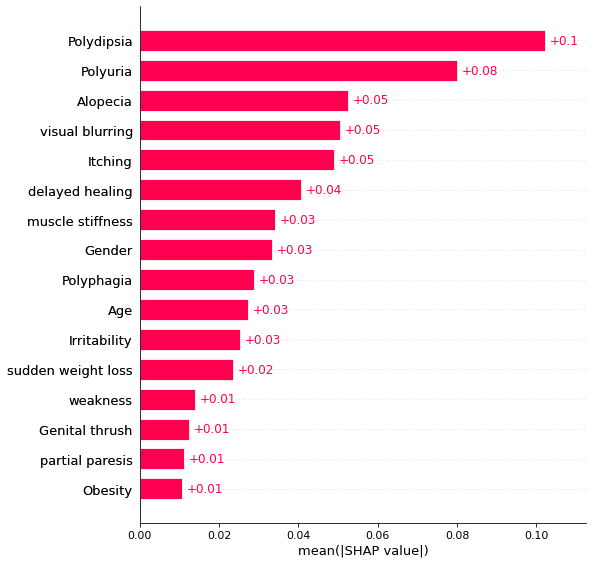

In [81]:
values = show_shap(quada)
shap_data = shap_value_data(values, shap_data)

In [82]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(x_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

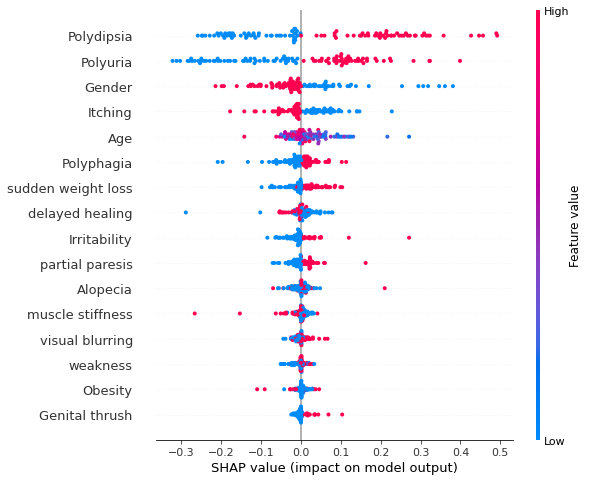

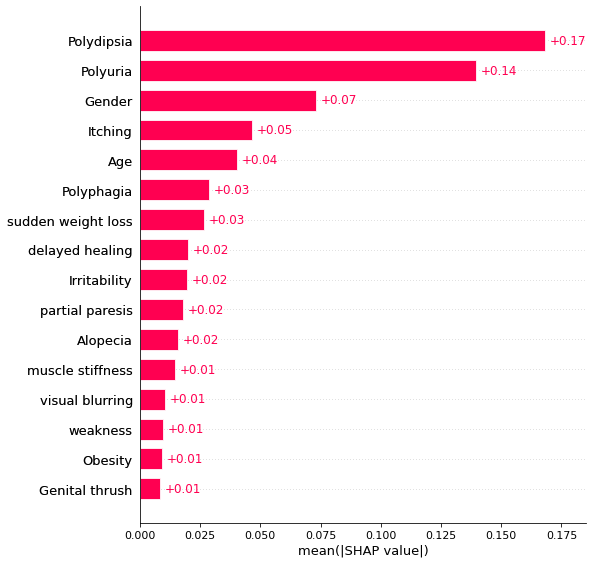

In [83]:
values = show_shap(lgbm)
shap_data = shap_value_data(values, shap_data)

In [84]:
shap_data

Age Gender Polyuria  ... muscle stiffness Alopecia Obesity
0   0.009  0.091    0.147  ...            0.020    0.013   0.006
1   0.028  0.053    0.100  ...            0.027    0.054   0.017
2   0.004  0.086    0.136  ...            0.023    0.035   0.007
3   0.008  0.044    0.173  ...            0.007    0.017   0.009
4   0.062  0.054    0.193  ...            0.025    0.079   0.022
5   0.025  0.059    0.174  ...            0.014    0.024   0.009
6   0.031  0.088    0.147  ...            0.029    0.000   0.004
7   0.031  0.099    0.152  ...            0.068    0.036   0.012
8   0.058  0.102    0.149  ...            0.000    0.005   0.000
9   0.027  0.086    0.182  ...            0.008    0.033   0.018
10  0.005  0.093    0.134  ...            0.002    0.017   0.002
11  0.004  0.072    0.176  ...            0.019    0.005   0.024
12  0.002  0.057    0.164  ...            0.014    0.046   0.005
13  0.032  0.104    0.138  ...            0.019    0.004   0.014
14  0.026  0.105    0.131  ...            0.022    0.003   0.010
15  0.001  0.057    0.149  ...            0.017    0.047   0.004
16  0.002  0.062    0.134  ...            0.016    0.044   0.006
17  0.010  0.065    0.130  ...            0.011    0.072   0.014
18  0.007  0.064    0.136  ...            0.007    0.069   0.006
19  0.000  0.058    0.147  ...            0.013    0.043   0.005
20  0.000  0.057    0.142  ...            0.012    0.043   0.003
21  0.047  0.069    0.177  ...            0.021    0.040   0.033
22  0.014  0.064    0.172  ...            0.016    0.018   0.009
23  0.032  0.085    0.179  ...            0.010    0.032   0.018
24  0.044  0.081    0.151  ...            0.019    0.013   0.014
25  0.006  0.082    0.139  ...            0.025    0.035   0.009
26  0.006  0.075    0.150  ...            0.035    0.021   0.011
27  0.014  0.055    0.107  ...            0.029    0.046   0.015
28  0.013  0.053    0.101  ...            0.030    0.040   0.012
29  0.027  0.081    0.166  ...            0.011    0.021   0.011
30  0.002  0.063    0.173  ...            0.019    0.018   0.018
31  0.017  0.106    0.144  ...            0.019    0.008   0.008
32  0.006  0.072    0.182  ...            0.017    0.005   0.024
33  0.027  0.033    0.080  ...            0.034    0.052   0.011
34  0.040  0.073    0.140  ...            0.015    0.016   0.009

[35 rows x 16 columns]

In [85]:
shap_data.to_excel('/content/shap_shyllet.xlsx')